# 1. Load the essential libraries

Packages used:


1.   Numpy
2. Pandas
3. Matplotlib
4. random
5. keras 





In [ ]:
# libaries are used

import pandas as pd  # pandas uses for work with multidimensional array
import numpy as np # works with array
import matplotlib.pyplot as plt # for visualization purpose
from keras.datasets import mnist # inbulit dataset in keras
from random import sample # to generate te random sample

# 2. Load the data
## Understand the minst data 
Modified National Institute of Standards and Technology (MNIST) is a dataset that contains images of handwritten digits. This dataset is pretty popular in the ML community for implementing and testing computer vision algorithms.

The labels corresponding to the test and training datasets are also available as separate files. 

The training dataset has 60,000 samples and the test dataset has 10,000 samples.

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
print('training data shape: ',x_train.shape)
print('Test data shape: ',x_test.shape)

training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


  1. Shape of the input and test data as it we load 
  2. Here we seen that train data have 60 thousand images 
  3. It is 2-dimensional image that menas all of the images in the data set are balck and white (Grey Scale)
  4. Here (28,28) clearly tells that it have no RGB color channel

In [ ]:
# print the shape of the lables 

y_train.shape,y_test.shape

((60000,), (10000,))

1. Here we know about the different type of labels. 
2. The labels in the data are one dimensional array with 60 thousand rows.

In [ ]:
# find the unique number of classes from train labels 

classes = np.unique(y_train) # y_train is a series
nclasses = len(classes)
print('Total number of Outputs : ',nclasses)
print('Output classes: ',classes)

Total number of Outputs :  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


1. From above we know how many uniuqe labels are associated with the data
2. And found the output class for the labels

In [ ]:
# we name the classes and map into the corresponding value

label_dict = {
    0: 'Zero',
 1: 'One',
 2: 'Two',
 3: 'Three',
 4: 'Four',
 5: 'Five',
 6: 'Six',
 7: 'Seven',
 8: 'Eight',
 9: 'Nine'
}

For our convenient we named each unique values in the data

Plot the first 5 images from the training data along with its labeled index.

Text(0.5, 1.0, '(Label: Five)')


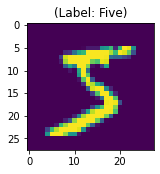

Text(0.5, 1.0, '(Label: Zero)')


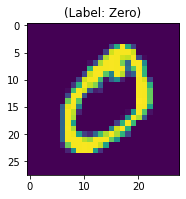

Text(0.5, 1.0, '(Label: Four)')


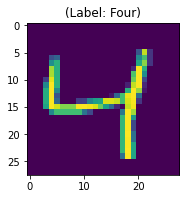

Text(0.5, 1.0, '(Label: One)')


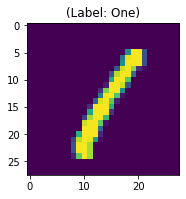

Text(0.5, 1.0, '(Label: Nine)')


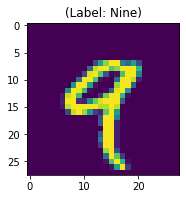

In [ ]:
# show the images from the dataset

plt.figure(figsize=(5,5))

# Display the first n inumber of images from training data 
n = 5
for i in range(0,n):
  plt.subplot(121)
  curr_imag = np.reshape(x_train[i],(28,28))
  plt.imshow(curr_imag)
  print(plt.title("(Label: "+ str(label_dict[y_train[i]])+")"))
  plt.show()

# 3. Prepartion of data

In [ ]:
# check the maximum and minimum value 

mini = np.min(x_train)
maxi = np.max(x_train)

print('The minimumm value is : ',mini)
print('The maximum value is: ', maxi)

The minimumm value is :  0
The maximum value is:  255


From this we found the maximum and miinimum pixel value of the entire image

In [ ]:
# Normalize the data

x_train = x_train/255.0

# after normalization find the maximum and minimum value fo rthe same data

mini_nor = np.min(x_train)
maxi_nor = np.max(x_train)

print('the minimumm value is : ',mini_nor)
print('the maximum value is: ', maxi_nor)

the minimumm value is :  0.0
the maximum value is:  1.0


After normilization the data could be change it self to normal form, (i.e) all the pixels in the image be lies in between 0 and 1

## Flatten the data
1. we are not able to with multidimensional data because it take so much time to compute.
2. To reduce the trianing time we are flatten the data from 3d to 1d.


In [ ]:
# Before flatten we are reshape the image from 2d to 1d 

x_train_flatt = x_train.reshape(x_train.shape[0],784) # reshape the image  

feat_cls = ['pixel' +str(i) for i in range(x_train_flatt.shape[1])] # name of the flatten cols

In [ ]:

df_mnist = pd.DataFrame(x_train_flatt,columns = feat_cls) # using pandas to change the dataframe

For working convinence change data into the data frame 

In [ ]:
df_mnist['label'] = y_train # add the label column into the dataframe 

print('Size of the Dataframe: {}'.format(df_mnist.shape))

Size of the Dataframe: (60000, 785)


In [ ]:
df_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


The size of the preprocessed datafrme is correct since there are 60k training images, each having 784 pixels and an additional column for labels so in total 785 columns.

# **4. Priciple Component Analysis (PCA)**
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.


*PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.*

## What is Principle components?
Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

*Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components (new axes which has maximum number of data points) of the data.*

## Steps for cretaing our own PCA:
  1. Subtract the mean of each variable.
  2. Calculate the Covariance of matrix/Correlation matrix.
  3. Compute Eigenvalues and EigenVectors.
  4. Sort Eigenvalues in desending order
  5. Select the subset from the rearranged Eigenvalue matrix
  6. Transform the data  

In [ ]:

# define our own PCA 
def PCA(X,num_components):

  # find the normalized data
  x_mean = X - np.mean(X,axis=0)

  # find the covarience matrix
  cov_mat = np.cov(x_mean,rowvar=False)

  # find eigen values and eigen vectors 
  eig_val,eig_vect = np.linalg.eigh(cov_mat) # here we got hermition matrix

  # sort the index for both eigen value and eigen vector
  sorted_index = np.argsort(eig_val)[::-1]
  sorted_eigval = eig_val[sorted_index]
  sorted_eigvect = eig_vect[:,sorted_index]

  # take the subset from the reduced 
  eigvect_subset = sorted_eigvect[:,0:num_components]

  # find the reduced components
  X_reduced = np.dot(eigvect_subset.T,x_mean.T).T

  return X_reduced


**Eigenvalue** is a Scalar and **Eigenvector** is a vector.

The difference between Eigenvector and normal vector is that Eigenvector does not change it’s direction when any linear Transformation is applied, it only changes the scalar value.

In [ ]:
X = df_mnist.iloc[:,0:784] 

reduce_data =PCA(X,2)

PCA will be applied on all the collumns except the last one, which is the label for each image.

In [ ]:
reduce_data_df = pd.DataFrame(reduce_data,columns=['PC1','PC2'])
reduce_data_df.head()

,PC1,PC2
0,-0.486010,-1.226174
1,-3.967523,-1.156302
2,0.203332,1.537934
3,3.133832,-2.381166
4,1.501000,2.864874


Above is the reduced Dataframe of the cifar data set.

Here we select top 2 Principle components to project the entire data. 

## 5. Visualize the projection
 Before we apply PCA visualize the data along with its group

 



## **KMeans Clustering:**

For better visualization we need to find the centroids of the given data because in our data have 9 different type of labels.So we are not perform any 2-D plotting technique to explain.

To find the centroids from the data we run the KMeans clutering, after that we found the optimal numbe r of centroids from the data.

In [ ]:
def distSquared(point1, point2):
  "it is a distance function.Here we used Euclidean Distance "
  assert point1.shape == point2.shape # assert is used for debugging the code
  return np.sum(np.square(point2-point1))

In [ ]:
def findClosestCentroids(myX, mycentroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the number of points, n is number of features per point)
    and the (K,n) centroid seed matrix
    (where K is the n number of centroids (clusters)
    and returns a (m,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = np.zeros((myX.shape[0],1))
    
    #Loop through each data point in X
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]):
            mycentroid = mycentroids[i]
            distsquared = distSquared(mycentroid,mypoint)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        #With the best index found, modify the result idx vector
        idxs[x] = idx
        
    return idxs

This returns the shortest distance between two points and returns it index of array.

In [ ]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

In [ ]:
def runKMeans(myX, initial_centroids, K, n_iter):
    """
    Function that actually does the iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [ ]:
def chooseKRandomCentroids(myX, K):
  """
  it chooses the random number centroids for the data
  """
  rand_indices = sample(range(0,myX.shape[0]),K)
  return np.array([myX[i] for i in rand_indices])

In [ ]:
k = 10
idxs, centoid_history = runKMeans(x_train,chooseKRandomCentroids(x_train,k),k,n_iter=10)

In [ ]:
idxs = findClosestCentroids(x_train,centoid_history[-1])

From KMeans clustering we found the number of clusters in the data, and make use it we find the projection trajectory for the data.



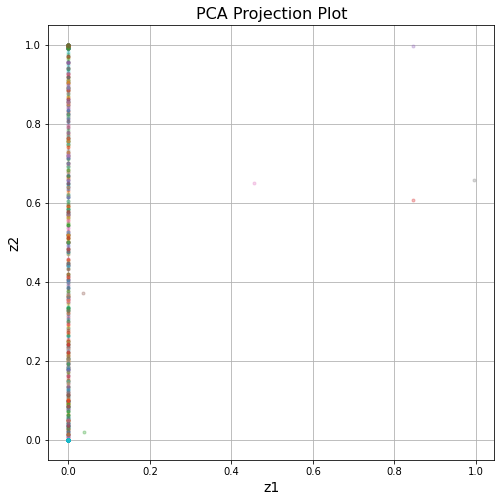

In [ ]:
# Make the 2D plot
subX = []
for x in range(len(np.unique(idxs))):
  subX.append(np.array([x_train[i] for i in range(x_train.shape[0]) if idxs[i] == x]))
        
fig = plt.figure(figsize=(8,8))
for x in range(len(subX)):
    newX = subX[x]
    # print(newX[0:])
    plt.plot(newX[:,0],newX[:,1],'.',alpha=0.3)
plt.xlabel('z1',fontsize=14)
plt.ylabel('z2',fontsize=14)
plt.title('PCA Projection Plot',fontsize=16)
plt.grid(True)
plt.show()

We clearly project the data into sctter plot, along with it is group

# 6. PCA Visualization

After applying the PCA visualize the data using it

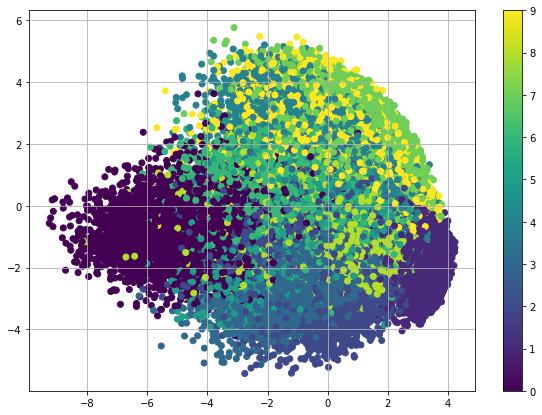

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x='PC1',y='PC2',data=reduce_data_df,cmap='viridis',c = y_train)
plt.grid()
plt.colorbar()
plt.show()

# 7. To find the Explained variance and screen plot

In [ ]:
#Eigen Decomposition
from numpy.linalg import eig

#For each column we are calculating the mean to center the columns
Mean = np.mean(df_mnist.iloc[:,0:784].T, axis=1)

#Here, we are subtracting the column means to center each column
mnist_standardise = df_mnist.iloc[:,0:784] - Mean

#calulating the covarience matrix
covariance_matrix = np.cov(mnist_standardise.T)

# calculating the eigen value and eigen vector
eig_val,eig_vect = eig(covariance_matrix)

eig_val_sorted = np.argsort(-eig_val) # sorting the eigen value 

#Here we are sorting the principle components in desceding order with respect to varaince. 
# rearranging it
cvar =  np.var(np.dot(mnist_standardise,eig_vect),axis=0) #cumulative variance
idx = np.argsort(-cvar)
cvar = cvar[idx]
eig_vect = eig_vect[:,idx]

print("Ratio of variance captured along each PrincipleComponent: ",np.cumsum(cvar)/np.sum(cvar))

Ratio of variance captured along each PrincipleComponent:  [0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076 0.8071405  0.81089154 0.81451162 0.81802754
 0.82142812 0.82464686 0.82783703 0.83096508 0.83392491 0.83681446
 0.83965576 0.84237012 0.84506533 0.84765006 0.85018776 0.85263557
 0.85504063 0.85743326 0.85973735 0.86195267 0.86408988 0.86616213
 0.86819256 0.87016038 0.87208891 0.87397523 0.875845   0.87765583
 0.87943146 0.88118044 0.88283802 0.88447696 0.88609158 0.88764274
 0.88911887 0.89055063 0.89197158 0.89338311 0.89478485 0.89614222
 0.

Ratio of avriance should be captured along each principle components should captured as a list.This is also known as **Explained Ratio Value**.

## **Screen plot**

we have 3072 eigenvalues and their eigenvectors in a word we have 3072 components. Choosing the number of componrents related to the amount of variance that is explained.


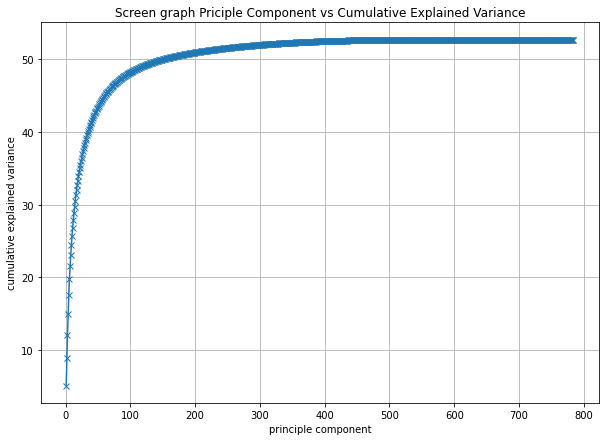

In [ ]:
plt.figure(figsize= (10,7))
plt.plot(np.arange(len(cvar))+1,np.cumsum(cvar),'x-')
plt.ylabel('cumulative explained variance')
plt.xlabel('principle component')
plt.title('Screen graph Priciple Component vs Cumulative Explained Variance')
plt.grid()
plt.show()

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


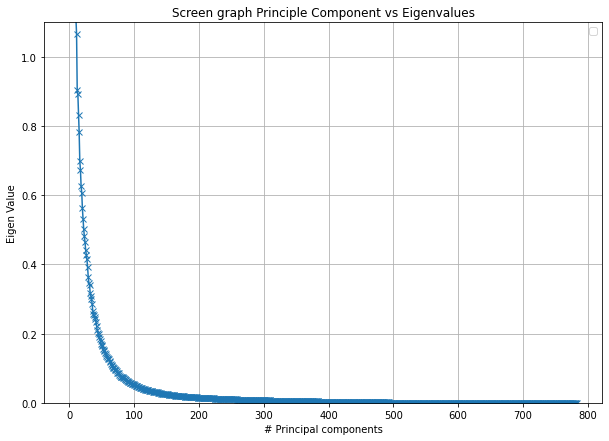

In [ ]:
plt.figure(figsize= (10,7))
plt.title('Screen graph Principle Component vs Eigenvalues')
plt.ylabel('Eigen Value')
plt.xlabel('# Principal components')
plt.ylim(0, 1.1)
plt.legend(loc = 'best')
plt.plot(range(eig_val.shape[0]),eig_val[eig_val_sorted],marker='x')
plt.grid()
plt.show()

The screen plot is a line plot used to determine how many factors to retain. We can decide the point after seeing a sharp drop with the rest of the components would add relatively little information.

In [ ]:
#selecting upto 2 principal components only

Y = np.dot(mnist_standardise,eig_vect[:,0:2]) # Standard top 2 PCA component 

#This is nothing but  z = W.T * X 
#we can write it as a .dot product - which is similar to W.T * X

print("After  Data Transformation\n",Y)
print("variance ratio captured along the projections: ",np.var(Y,axis=0)/np.sum(np.var(mnist_standardise,axis=0)))

After  Data Transformation
 [[-0.48601015+0.j -1.22617358+0.j]
 [-3.96752304+0.j -1.15630211+0.j]
 [ 0.2033318 +0.j  1.53793393+0.j]
 ...
 [ 0.69824882+0.j  0.62775769+0.j]
 [-0.51218067+0.j -0.02192916+0.j]
 [ 0.68014099+0.j -0.09693648+0.j]]
variance ratio captured along the projections:  [0.09704664 0.07095924]


The variance that has largest value is selected as components.
[Expained variation per principle component] :
[0.09704664 0.07095924]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


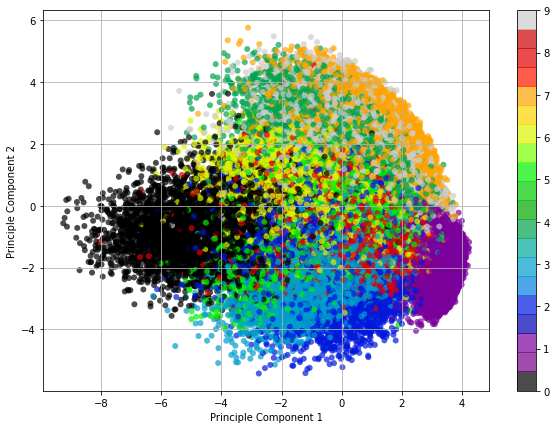

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(Y[:, 0], Y[:, 1],
            c = y_train, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('nipy_spectral', 20));
plt.grid()
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.colorbar()
plt.show()

In [ ]:
def plot_mnist_pca(X_pca, y):
  plt.figure(figsize = (10,7))
  markers = 's','x','o','.',',','<','>', '^','8','*'
  colors = list(plt.rcParams['axes.prop_cycle'])
  target = np.unique(y)
  print(list(zip(target,markers)))
  for idx, (t, m) in enumerate(zip(target, markers)):
      subset = X_pca[y == t]
      plt.scatter(subset[:, 0], subset[:, 1], s = 50,c = colors[idx]['color'], label = t, marker = m)
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc = 'lower left')
  plt.tight_layout()
  plt.figure()
  plt.show()

[(0, 's'), (1, 'x'), (2, 'o'), (3, '.'), (4, ','), (5, '<'), (6, '>'), (7, '^'), (8, '8'), (9, '*')]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


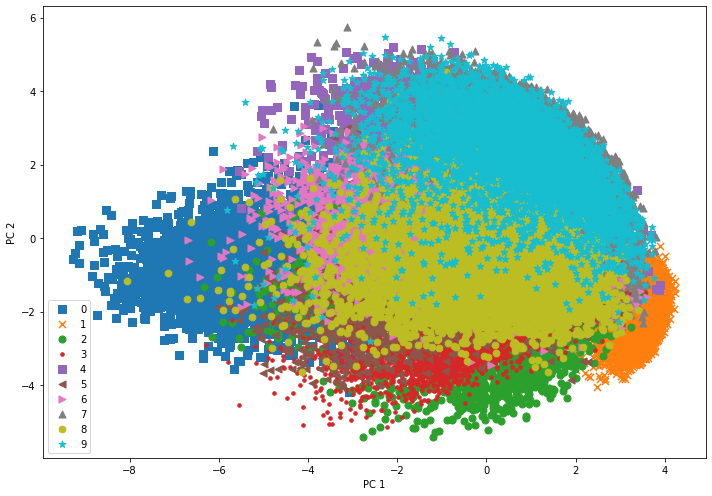

<Figure size 432x288 with 0 Axes>

(784, 5)


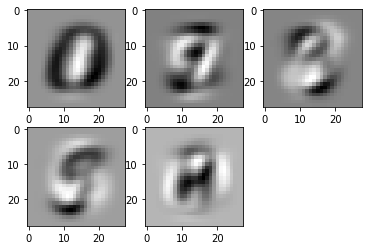

In [ ]:
plot_mnist_pca(Y, y_train)
print(eig_vect[:,eig_val_sorted[:5]].shape)
for i in range(5):
    reshape = eig_vect[:,eig_val_sorted[i]].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(reshape.real, cmap = "gray")

This is how the data looks like after reduction.

# 8. Conclusion:
From the above we retained the decent amount information was retained by the principal componets 1 and 2 , given that the data was projected from 784 dimensions toa mere 2 pricipal components.